In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [113]:
df = pd.read_csv("data_date.csv")

# Initial Data Exploring 

In [114]:
# Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Check dataset structure and info
print("\nDataset information:")
print(df.info())

# Generate summary statistics
print("\nSummary statistics:")
print(df.describe())

# Identify columns with missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



First few rows of the dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18759 entries, 0 to 18758
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18759 non-null  object
 1   Country    18759 non-null  object
 2   Status     18759 non-null  object
 3   AQI Value  18759 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 586.3+ KB
None

Summary statistics:
          AQI Value
count  18759.000000
mean      63.739165
std       50.288355
min        1.000000
25%       29.00000

# Handling Missing Values

In [115]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
Date         0.0
Country      0.0
Status       0.0
AQI Value    0.0
dtype: float64


There are no missing values in the dataset.

# Identifying Outliers

Number of outliers: 656

Sample of outliers:
          Date   Country  AQI Value
9   2022-07-21   Bahrain        165
27  2022-07-21     Chile        178
40  2022-07-21  Ethiopia        165
61  2022-07-21      Iran        250
62  2022-07-21      Iraq        234


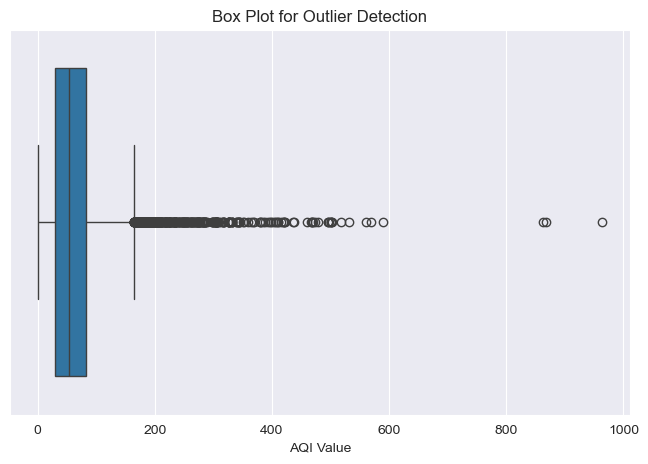

In [116]:
# Function to detect outliers using IQR method
# Calculate Q1, Q3, and IQR for AQI Value
Q1 = df['AQI Value'].quantile(0.25)
Q3 = df['AQI Value'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['AQI Value'] < lower_bound) | (df['AQI Value'] > upper_bound)]
print("Number of outliers:", len(outliers))
print("\nSample of outliers:")
print(outliers[['Date', 'Country', 'AQI Value']].head())

# Create box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AQI Value'])
plt.title("Box Plot for Outlier Detection")
plt.show()

# Handling Outliers


Original dataset size: 18759
Dataset size after removing outliers: 18103


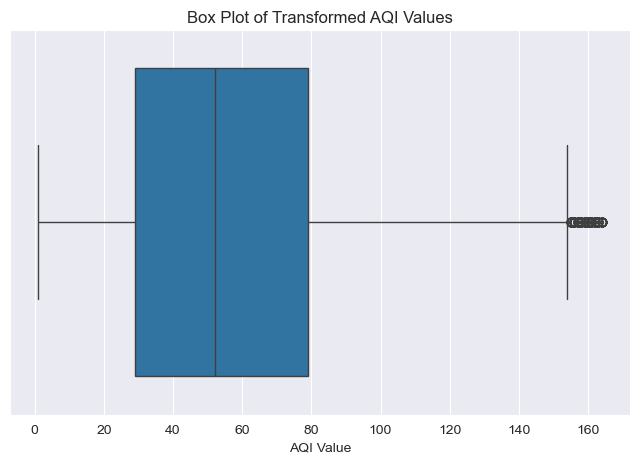


Summary Statistics of Transformed Data:
count    18103.000000
mean        57.936364
std         37.110771
min          1.000000
25%         29.000000
50%         52.000000
75%         79.000000
max        164.000000
Name: AQI Value, dtype: float64


In [117]:

# Remove outliers
df_filtered = df[(df['AQI Value'] >= lower_bound) & (df['AQI Value'] <= upper_bound)]

# Save the filtered dataset
df_filtered.to_csv('data_transformed.csv', index=False)

print("Original dataset size:", len(df))
print("Dataset size after removing outliers:", len(df_filtered))

# Read the transformed data
df_transformed = pd.read_csv('data_transformed.csv')

# Create box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_transformed['AQI Value'])
plt.title("Box Plot of Transformed AQI Values")
plt.xlabel("AQI Value")
plt.show()

# Print summary statistics
print("\nSummary Statistics of Transformed Data:")
print(df_transformed['AQI Value'].describe())
